In [70]:
# !pip install nltk

In [71]:
import torch
import nltk
import torch.nn as nn
from torch.utils.data import Dataset , DataLoader
import torch.optim as optim
import numpy as np
from collections import Counter
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [72]:
document =f"""
The Taj Mahal, located in Agra, India, stands as one of the most iconic architectural masterpieces in the world.
Built by the Mughal Emperor Shah Jahan in the 17th century, the Taj Mahal is not only a symbol of love and devotion but also a testament to the technical and artistic brilliance of the Mughal era.
This case study explores the historical background, architectural features, cultural significance, and conservation challenges associated with this UNESCO World Heritage Site.

The origin of the Taj Mahal is rooted in a personal tragedy.
Shah Jahan commissioned the mausoleum in memory of his beloved wife Mumtaz Mahal, who died in 1631 during childbirth.
Deeply stricken by grief, Shah Jahan sought to immortalize her with a monument that would embody eternal love.
Construction began in 1632 and was largely completed by 1648, although additional work on surrounding structures continued for several years.
Over 20,000 artisans and laborers, including architects from across the empire and beyond, contributed to this grand project.

The Taj Mahal is widely regarded as a pinnacle of Mughal architecture, which blends elements from Islamic, Persian, Ottoman Turkish, and Indian architectural styles.
The central structure is a white marble mausoleum set upon a raised platform, flanked by four minarets. The use of symmetry is meticulous: the entire complex is laid out in a charbagh, or Mughal garden, divided by water channels and walkways into four quadrants.
The main building houses the cenotaphs of Mumtaz Mahal and Shah Jahan, although the actual graves lie in a lower chamber.

The white marble used in the construction was sourced from Makrana in Rajasthan and is noted for its high quality and translucent properties.
The surface of the monument is adorned with intricate inlay work using semi-precious stones like lapis lazuli, jade, crystal, and turquoise, forming elaborate floral patterns and Quranic inscriptions.
These decorations reflect both the religious and aesthetic values of the period.

One of the most striking features of the Taj Mahal is its ability to change appearance depending on the time of day and weather conditions.
In the early morning, the monument may appear pinkish; in the evening, golden; and under moonlight, a soft silvery hue.
This dynamic visual quality enhances the emotional and spiritual experience of the viewer, aligning with its purpose as a sacred memorial.

The Taj Mahal holds deep cultural and symbolic meaning. It is often referred to as a monument of love, representing not just the romantic bond between Shah Jahan and Mumtaz Mahal but also the broader themes of devotion, memory, and transcendence.
Over the centuries, it has inspired poets, artists, and travelers from around the world. Rabindranath Tagore famously described it as “a teardrop on the cheek of time.”

Despite its enduring beauty, the Taj Mahal has faced numerous conservation challenges.
Environmental pollution, particularly from the nearby Yamuna River and industrial emissions, has led to the yellowing of its once-pristine marble.
Acid rain and particulate matter have caused surface erosion and discoloration. The groundwater table beneath the monument has also been declining, raising concerns about the long-term stability of its wooden foundation.

To mitigate these threats, the Indian government and international bodies have implemented several preservation initiatives.
The Taj Trapezium Zone (TTZ) was established to regulate industrial activity around the monument. Regular cleaning processes using clay packs (Multani mitti) help remove surface grime without damaging the marble. Efforts have also been made to plant more greenery and install air-purifying devices in the vicinity.

Tourism plays a dual role in the life of the Taj Mahal. On one hand, it generates significant revenue and raises global awareness about India’s cultural heritage.
Millions of visitors from around the world flock to Agra each year to witness its splendor. On the other hand, the massive footfall leads to wear and tear of the structure and surrounding environment.
Managing the balance between accessibility and preservation remains a constant challenge for authorities.

The Taj Mahal is more than just an architectural feat; it is a living symbol of India's historical legacy, cultural richness, and artistic heritage.
It has been the subject of countless studies, documentaries, and literary works. In recent years, it has also become a focal point in debates about historical memory, religious identity, and conservation ethics.

As a UNESCO World Heritage Site, the Taj Mahal is recognized for its outstanding universal value.
Its inclusion in the list has helped garner international support for its preservation. However, the responsibility of safeguarding this monument ultimately rests with the collective efforts of government institutions, local communities, and global citizens.

In conclusion, the Taj Mahal is not merely a relic of the past but a vibrant part of the present and a beacon for the future.
It stands as a powerful reminder of what humanity can achieve when love, vision, and craftsmanship converge.
Preserving its legacy is not just about maintaining a structure, but about honoring the values and stories it represents.
Through continuous care and conscious stewardship, the Taj Mahal will continue to inspire generations to come.
"""


In [73]:
type(document)

str

In [74]:
tokens = word_tokenize(document.lower())

In [75]:
vocab = {'<unk>': 0}
for token in Counter(tokens).keys():
    vocab[token] = len(vocab)
len(vocab)

448

In [76]:
# Extract Sentences from data

input_sentences = document.split('.')

print(len(input_sentences))
input_sentences


46


['\nThe Taj Mahal, located in Agra, India, stands as one of the most iconic architectural masterpieces in the world',
 ' \nBuilt by the Mughal Emperor Shah Jahan in the 17th century, the Taj Mahal is not only a symbol of love and devotion but also a testament to the technical and artistic brilliance of the Mughal era',
 ' \nThis case study explores the historical background, architectural features, cultural significance, and conservation challenges associated with this UNESCO World Heritage Site',
 '\n\nThe origin of the Taj Mahal is rooted in a personal tragedy',
 '\nShah Jahan commissioned the mausoleum in memory of his beloved wife Mumtaz Mahal, who died in 1631 during childbirth',
 '\nDeeply stricken by grief, Shah Jahan sought to immortalize her with a monument that would embody eternal love',
 '\nConstruction began in 1632 and was largely completed by 1648, although additional work on surrounding structures continued for several years',
 '\nOver 20,000 artisans and laborers, incl

In [77]:
# replace each words with its index

def text_to_index(sentence, vocab):
  num_sentence = []
  for word in sentence:
    if word in vocab.keys():
      num_sentence.append(vocab[word])
    else:
      num_sentence.append(vocab['<unk>'])
  return num_sentence


In [78]:
input_num_sentences = []
for sentence in input_sentences:
    input_num_sentences.append(text_to_index(word_tokenize(sentence.lower()), vocab))

print(len(input_num_sentences))
# input_num_sentences

46


In [79]:
# Create sequence of each list

for sen in input_num_sentences:
    for i in range(1, len(sen)):
      print(sen[: i+1])
    break

[1, 2]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 4]
[1, 2, 3, 4, 5, 6, 7, 4, 8]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9, 10, 11]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9, 10, 11, 12, 1]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9, 10, 11, 12, 1, 13]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9, 10, 11, 12, 1, 13, 14]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9, 10, 11, 12, 1, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9, 10, 11, 12, 1, 13, 14, 15, 16]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9, 10, 11, 12, 1, 13, 14, 15, 16, 6]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9, 10, 11, 12, 1, 13, 14, 15, 16, 6, 1]
[1, 2, 3, 4, 5, 6, 7, 4, 8, 4, 9, 10, 11, 12, 1, 13, 14, 15, 16, 6, 1, 17]


In [80]:
training_seq = []
for sen in input_num_sentences:
    for i in range(1, len(sen)):
      training_seq.append(sen[: i+1])


In [81]:
len(training_seq)

857

In [82]:
#all the list of training_seq should have same size
max_len = 1  # get the maximum len of sequence

for seq in training_seq:
  max_len = max(max_len, len(seq))

max_len

# add 0s to the seq(list) so that its len becomes max_len

padded_training_seq = []
for seq in training_seq:
  padded_training_seq.append([0]*(max_len - len(seq)) + seq)

padded_training_seq[0]



[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2]

In [83]:
len(padded_training_seq[0])

38

In [84]:
padded_training_seq = torch.tensor(padded_training_seq , dtype = torch.long)

In [85]:
padded_training_seq.shape

torch.Size([857, 38])

In [86]:
# Extract X and y , y : last element of each list and remaining one is X
X = padded_training_seq[:, :-1]
y = padded_training_seq[:, -1]

In [87]:
y.shape

torch.Size([857])

In [88]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):

    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]


In [89]:
dataset = CustomDataset(X, y)

In [90]:
dataset[0]

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 tensor(2))

In [91]:
len(dataset)

857

In [92]:
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)   # will process 32 sentences at once

In [93]:
for input , output in train_loader:
  print(input)
  print(output)
  break

tensor([[  0,   0,   0,  ..., 143,   1, 144],
        [  0,   0,   0,  ...,  33, 285, 286],
        [  0,   0,   0,  ...,   4, 252, 280],
        ...,
        [  0,   0,   0,  ..., 389,  30, 390],
        [  0,   0,   0,  ..., 161, 162, 163],
        [  0,   0,   0,  ...,  10,  30, 118]])
tensor([145, 287,  38,  95,  38,  12,   1,  43,  32,  81,   1, 353, 162, 392,
          1, 383, 142,   3, 361,   4, 381,  21,   4,  55,   7, 171, 219,   6,
         12, 391,   6,  12])


### 🧠 LSTM Input Workflow Explanation

We are using a batch-based approach to train our LSTM model.

- **Batch Size**: We are passing **32 sentences at a time** (i.e., `batch_size = 32`).
- **Sentence Representation**:
  - Each sentence consists of **38 tokens (words)**.
  - Each token is represented by a **100-dimensional word embedding** (using an embedding layer).
  - So, each sentence becomes a tensor of shape **(38, 100)**.

---

#### 📥 Input Tensor Shape

At each batch, we pass an input tensor of shape:

(batch_size, sequence_length, embedding_dim) = (32, 38, 100)

Where:
- `32`: number of sentences in a batch  
- `38`: number of tokens (time steps) per sentence  
- `100`: size of the word embedding for each token  

---

#### 🔁 LSTM Time Step Operation

- LSTM processes input **one time step at a time**, i.e., it reads one token (word) per sentence across all 32 sentences at each time step.
- At **time step `t = 0`**:
  - The LSTM receives the **first token** of all 32 sentences — shape: **(32, 100)**
  - It also takes in an initial hidden state `h₀` and cell state `c₀` (usually initialized to zeros if not provided)
  - It outputs the hidden state `h₁` and cell state `c₁`

- At **time step `t = 1`**:
  - The LSTM receives the **second token** from all sentences
  - It uses `h₁` and `c₁` from the previous time step
  - This process continues up to `t = 37` (since sequence length = 38)

---



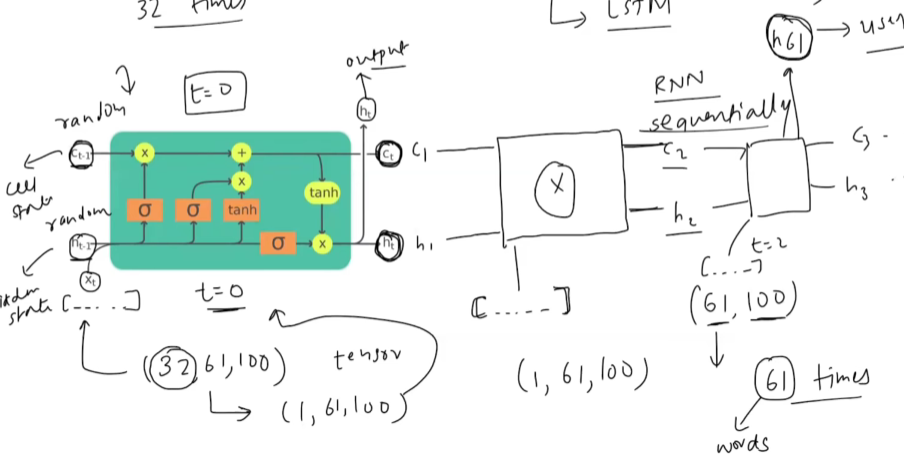

In [94]:
class LSTMModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, 100) # dim of embedding
    self.lstm = nn.LSTM(100, 150, batch_first=True)  # dim of embedding , num of neurons in each lstm
    self.fc = nn.Linear(150, vocab_size)

  def forward(self, x):
    embedded = self.embedding(x)
    intermediate_hidden_states, (final_hidden_state, final_cell_state) = self.lstm(embedded)
    output = self.fc(final_hidden_state.squeeze(0))
    return output


In [95]:
model = LSTMModel(len(vocab))

In [ ]:
# For GPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

In [97]:
epochs = 50
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [98]:
# training loop

for epoch in range(epochs):
  total_loss = 0

  for batch_x, batch_y in train_loader:

    # batch_x, batch_y = batch_x.to(device), batch_y.to(device)

    optimizer.zero_grad()

    output = model(batch_x)

    loss = criterion(output, batch_y)

    loss.backward()

    optimizer.step()

    total_loss = total_loss + loss.item()

  print(f"Epoch: {epoch + 1}, Loss: {total_loss:.4f}")

Epoch: 1, Loss: 163.6677
Epoch: 2, Loss: 148.5678
Epoch: 3, Loss: 137.7025
Epoch: 4, Loss: 129.0625
Epoch: 5, Loss: 119.5666
Epoch: 6, Loss: 110.3589
Epoch: 7, Loss: 100.6761
Epoch: 8, Loss: 91.2187
Epoch: 9, Loss: 82.5368
Epoch: 10, Loss: 73.8794
Epoch: 11, Loss: 65.7743
Epoch: 12, Loss: 57.9816
Epoch: 13, Loss: 50.9776
Epoch: 14, Loss: 44.7640
Epoch: 15, Loss: 38.8332
Epoch: 16, Loss: 33.5313
Epoch: 17, Loss: 29.1003
Epoch: 18, Loss: 25.1778
Epoch: 19, Loss: 21.9234
Epoch: 20, Loss: 19.1811
Epoch: 21, Loss: 16.7697
Epoch: 22, Loss: 14.8470
Epoch: 23, Loss: 13.2207
Epoch: 24, Loss: 11.8360
Epoch: 25, Loss: 10.6123
Epoch: 26, Loss: 9.5941
Epoch: 27, Loss: 8.7348
Epoch: 28, Loss: 8.0106
Epoch: 29, Loss: 7.3464
Epoch: 30, Loss: 6.8692
Epoch: 31, Loss: 6.4378
Epoch: 32, Loss: 6.0233
Epoch: 33, Loss: 5.6246
Epoch: 34, Loss: 5.2813
Epoch: 35, Loss: 4.9942
Epoch: 36, Loss: 4.7394
Epoch: 37, Loss: 4.5199
Epoch: 38, Loss: 4.3953
Epoch: 39, Loss: 4.2089
Epoch: 40, Loss: 3.9580
Epoch: 41, Loss: 

In [99]:
# # prediction

def prediction(model, vocab, text):

  # tokenize
  tokenized_text = word_tokenize(text.lower())

  # text -> numerical indices
  numerical_text = text_to_index(tokenized_text, vocab)

  # padding
  padded_text = torch.tensor([0] * (61 - len(numerical_text)) + numerical_text, dtype=torch.long).unsqueeze(0)

  # send to model
  output = model(padded_text)

  # predicted index
  value, index = torch.max(output, dim=1)

  # merge with text
  return text + " " + list(vocab.keys())[index]



In [107]:
prediction(model, vocab, "The Taj Mahal, located in Agra")

'The Taj Mahal, located in Agra ,'

In [108]:
import time

num_tokens = 10
input_text = "The Taj Mahal, located in Agra"

for i in range(num_tokens):
  output_text = prediction(model, vocab, input_text)
  print(output_text)
  input_text = output_text
  time.sleep(0.5)


The Taj Mahal, located in Agra ,
The Taj Mahal, located in Agra , india
The Taj Mahal, located in Agra , india ,
The Taj Mahal, located in Agra , india , stands
The Taj Mahal, located in Agra , india , stands as
The Taj Mahal, located in Agra , india , stands as one
The Taj Mahal, located in Agra , india , stands as one of
The Taj Mahal, located in Agra , india , stands as one of the
The Taj Mahal, located in Agra , india , stands as one of the most
The Taj Mahal, located in Agra , india , stands as one of the most iconic


In [102]:
dataloader1 = DataLoader(dataset, batch_size=32, shuffle=False)

In [110]:
# # Function to calculate accuracy
# def calculate_accuracy(model, dataloader, device):
#     model.eval()  # Set the model to evaluation mode
#     correct = 0
#     total = 0

#     with torch.no_grad():  # No need to compute gradients
#         for batch_x, batch_y in dataloader1:
#             batch_x, batch_y = batch_x.to(device), batch_y.to(device)

#             # Get model predictions
#             outputs = model(batch_x)

#             # Get the predicted word indices
#             _, predicted = torch.max(outputs, dim=1)

#             # Compare with actual labels
#             correct += (predicted == batch_y).sum().item()
#             total += batch_y.size(0)

#     accuracy = correct / total * 100
#     return accuracy

# # Compute accuracy
# accuracy = calculate_accuracy(model, text_to_index, device)
# print(f"Model Accuracy: {accuracy:.2f}%")


# Function to calculate accuracy
def calculate_accuracy(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients
        for batch_x, batch_y in dataloader1:
            # batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Get model predictions
            outputs = model(batch_x)

            # Get the predicted word indices
            _, predicted = torch.max(outputs, dim=1)

            # Compare with actual labels
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

    accuracy = correct / total * 100
    return accuracy

# Compute accuracy
accuracy = calculate_accuracy(model, text_to_index)
print(f"Model Accuracy: {accuracy:.2f}%")



Model Accuracy: 97.90%
